<a href="https://colab.research.google.com/github/EstelleSimon/ECONOMETRIE_projet/blob/main/Econometrie_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
install.packages("googledrive")
install.packages("readxl")
install.packages("ggplot2")
install.packages("reshape")
install.packages("urca")
install.packages("exuber")
install.packages("data.table")
install.packages('lmtest')
install.packages('sandwich')
sessionInfo()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readxl_1.4.3      googledrive_2.1.1

loaded via a namespace (and not attached):
 [1] jsonlite_1.8.7    dplyr_1.1.3       compiler_4.3.1    crayon_1.5.2     
 [5] tidy

Data is from the Federal Reserve official website: https://www.federalreserve.gov/releases/h15/

In [38]:
library(googledrive)
drive_download("https://docs.google.com/spreadsheets/d/103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw/edit?usp=sharing",overwrite=TRUE)


File downloaded:

• FEDFUND <id: 103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw>

Saved locally as:

• FEDFUND.xlsx



Source: https://fr.investing.com/indices/s-p-500-energy

In [23]:
drive_download("https://docs.google.com/spreadsheets/d/1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY/edit?usp=sharing",overwrite = TRUE)

File downloaded:

• 'S&P 500 Energy (Sector)' <id: 1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY>

Saved locally as:

• S&P 500 Energy (Sector).xlsx



In [26]:
library(readxl)
EnergySector <- read_xlsx(path = "S&P 500 Energy (Sector).xlsx", skip = 1, sheet = "ES")
colnames(EnergySector) <- c("date", "DataES")


In [42]:
library(readxl)
FEDFUND<-read_xlsx(path = "FEDFUND.xlsx",skip=593,sheet = "FF")
colnames(FEDFUND)<-c("date","DataFF")

In [33]:
# Calculer le logarithme népérien de la colonne "DataES" et le stocker dans une nouvelle colonne
EnergySector$log_DataES <- log(EnergySector$DataES)

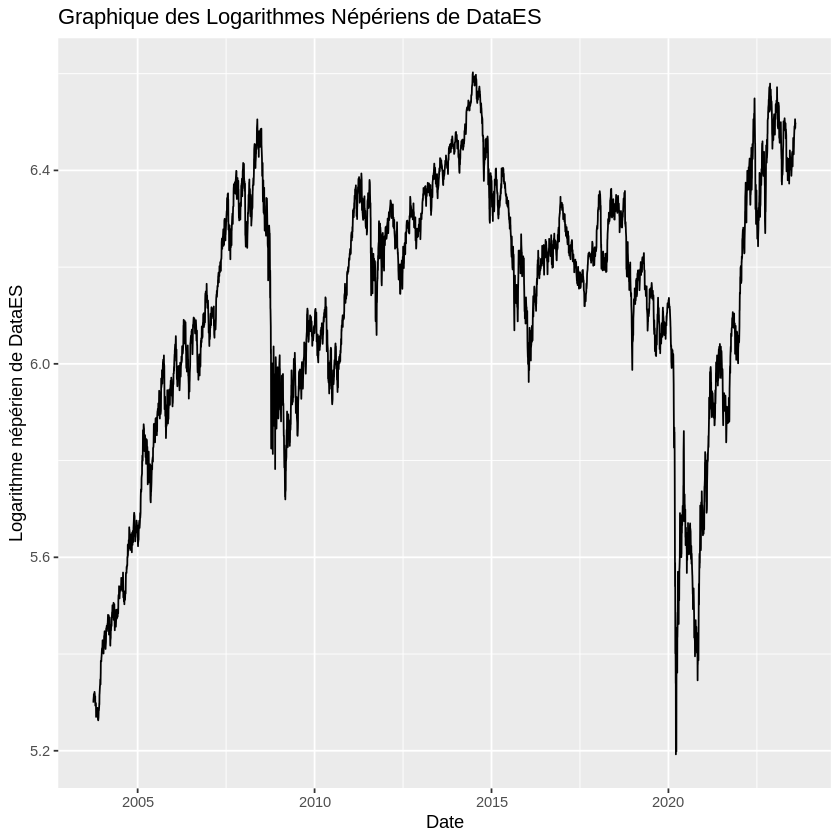

In [34]:
library(ggplot2)
ggplot(data = EnergySector, aes(x = date, y = log_DataES)) +
  geom_line() +
  labs(x = "Date", y = "Logarithme népérien de DataES") +
  ggtitle("Graphique des Logarithmes Népériens de DataES")

In [43]:
# Calculer le logarithme népérien de la colonne "DataES" et le stocker dans une nouvelle colonne
FEDFUND$log_DataFF <- log(FEDFUND$DataFF)

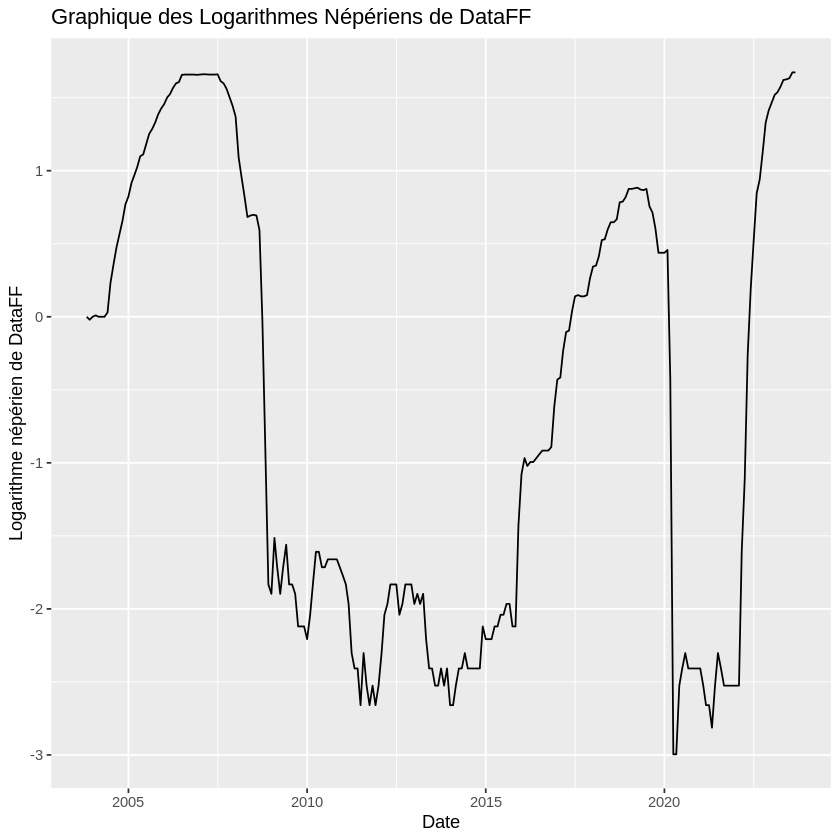

In [44]:
library(ggplot2)
ggplot(data = FEDFUND, aes(x = date, y = log_DataFF)) +
  geom_line() +
  labs(x = "Date", y = "Logarithme népérien de DataFF") +
  ggtitle("Graphique des Logarithmes Népériens de DataFF")

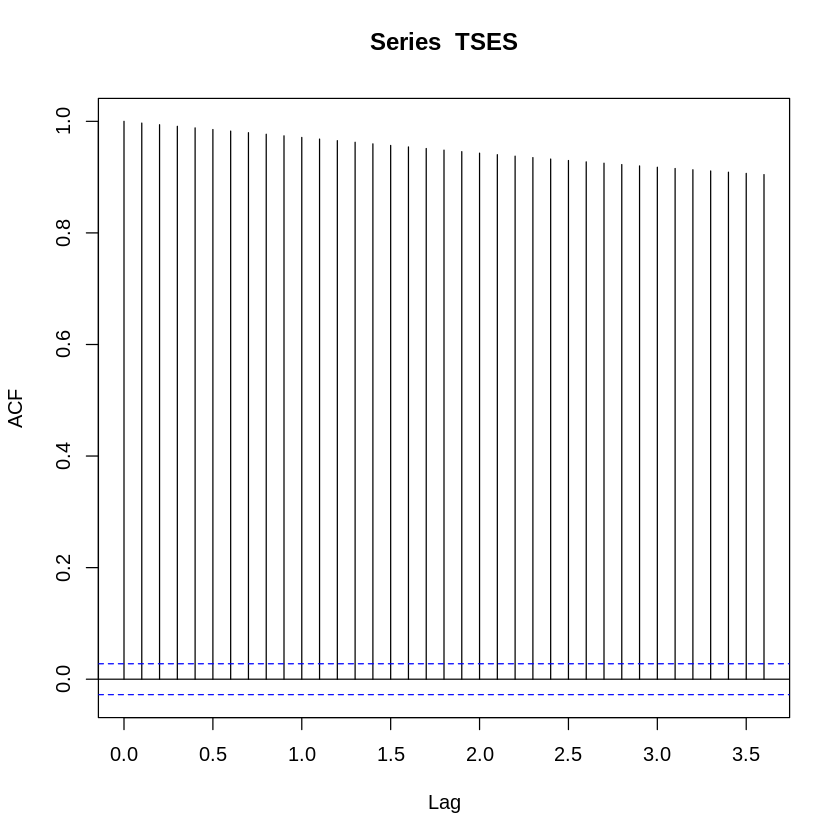

In [61]:
TSES <- ts(EnergySector$DataES, frequency = 10)

acf(TSES)

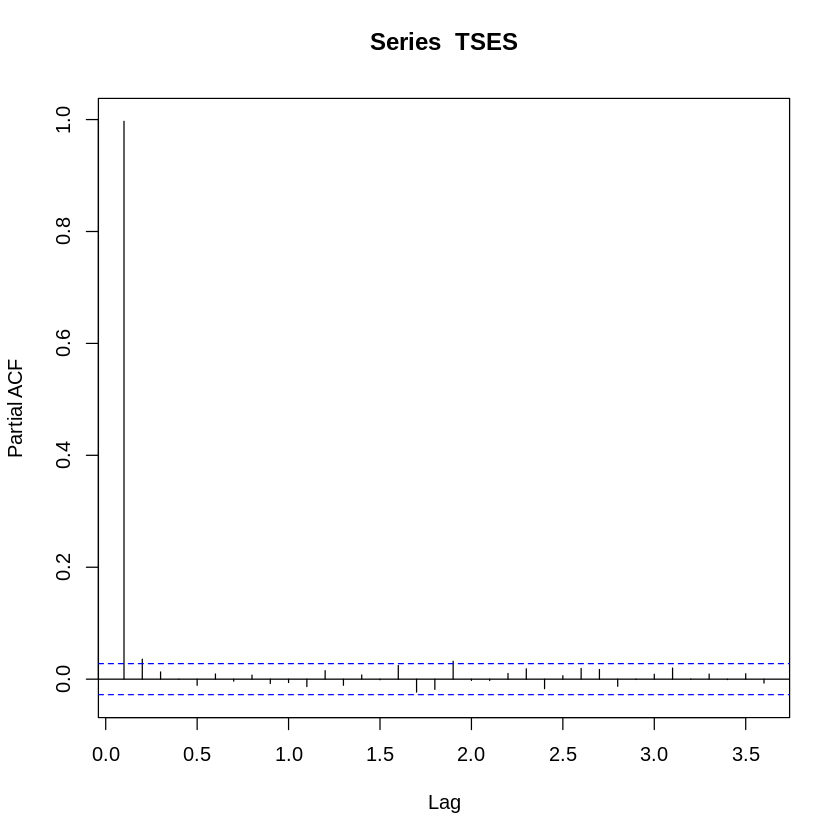

In [62]:
pacf(TSES)

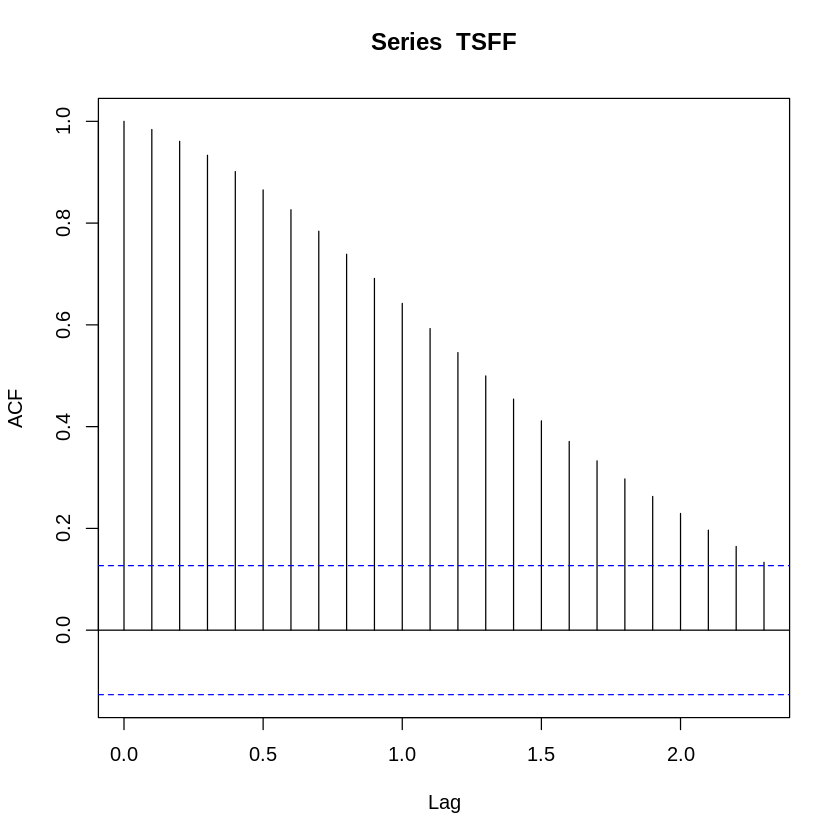

In [63]:
TSFF <- ts(FEDFUND$DataFF, frequency = 10)

acf(TSFF)

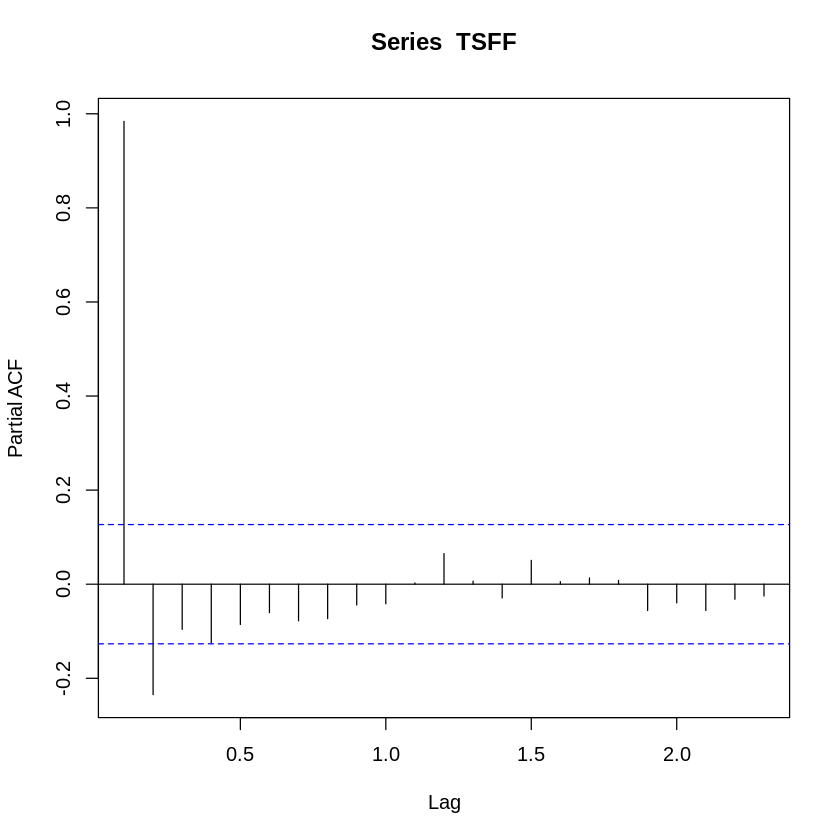

In [64]:
pacf(TSFF)